# **Bellabeat Case Study**
# **INTRODUCTION**
This case study is part of the final course of Google Data Analytics Capstone: Complete a Case Study. 

In this case study we will try to analyze the Fitbit users data to get an insight on behavior of the users and apply the insight gathered from there to provide recomendations to Bellabeat to create a better customer experience for its users.

The 6 steps of Data Analysis is used to present this analysis.



# **1. ASK PHASE**

# Ask - About the Company - Bellabeat
* Bellabeat (founded in 2013) is a high-tech company that manufactures health-focused smart products. Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.
* The company has invested in traditional advertising media, such as radio, out-of-home billboards, print, and television, but focuses on digital marketing extensively. Bellabeat also invests year-round in Google Search, maintaining active Facebook and Instagram, and Twitter pages. 
* Bellabeat product potfolio – 
    1. Bellabeat app -The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits.
    2. Leaf - Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip.
    3. Time - This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress.
    4. Spring - : This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day.
    5. Bellabeat membership: Bellabeat also offers a subscription-based membership program for users.


# Ask - Business Task
* Analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices.
* Select one Bellabeat product to apply these insights and analyze smart device usage data in order to gain insight into how people are already using their smart devices. 
* A high level recommendation plan on how these trends can help marketing strategies at Bellabeat to drive sales further.

# Ask - Key Stakeholders
* Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer 
* Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
* Bellabeat marketing analytics team: A team of data analysts guiding Bellabeat's marketing strategy

# **2. PREPARE PHASE**

# Prepare – Information on the data source!
* FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Möbius)
* This Kaggle data set contains personal fitness tracker from thirty fitbit users. This dataset was generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016.
* Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.

# Prepare - Limitation of the Dataset!
* Data collected from year 2016. Users' daily activity, fitness and sleeping habits, diet and food consumption may have changed since then, hence data may not be timely or relevant.
* Sample size of 30 female FitBit users is not representative of the entire female population.
* As data is collected in a survey, hence unable to ascertain the integrity or accuracy of data.
* The data is arranged in a long format rather than wide format as there are multiple rows for a user ID w.r.t. dates.

# Prepare - Is the data ROCC?
A good data source is ROCCC which stands for Reliable, Original, Comprehensive, Current, and Cited.
*     Reliable - Not reliable as it only has 30 respondents (LOW)
*     Original - Third party provider (LOW)
*     Comprehensive – Basic observations available only (LOW)
*     Current - LOW - Data is 5 years old and is not relevant (LOW)
*     Cited - Data collected from survey via Amazon Mechanical Turk (LOW)
This data acts as a bad data source because of the low score in ROCC as seen above and it is not recommended for preforming business analysis.

# **3. PROCESS PHASE**

Install and load all the required libraries that we will use for analysis in R

In [23]:


library(tidyverse)
library(dplyr) 
library(ggplot2)
library(lubridate)
library(janitor)
library(skimr)
library(ggpubr)

Load CSV Files
I selected 3 data sets that provided daily activity, daily sleep logs, and weight logs.

Renamed the data sets to make them easier to work with during analysis.

* daily_activity <- dailyActivity_merged (has daily steps and daily calories included)
* sleep_log <- sleepDay_merged
* weight_log <- weightLogInfo_merged

In [24]:
daily_activity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep_log <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_log <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityDate = col_character(),
  TotalSteps = col_double(),
  TotalDistance = col_double(),
  TrackerDistance = col_double(),
  LoggedActivitiesDistance = col_double(),
  VeryActiveDistance = col_double(),
  ModeratelyActiveDistance = col_double(),
  LightActiveDistance = col_double(),
  SedentaryActiveDistance = col_double(),
  VeryActiveMinutes = col_double(),
  FairlyActiveMinutes = col_double(),
  LightlyActiveMinutes = col_double(),
  SedentaryMinutes = col_double(),
  Calories = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  SleepDay = col_character(),
  TotalSleepRecords = col_double(),
  TotalMinutesAsleep = col_double(),
  TotalTimeInBed = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  Date = col_character()

In this stage, the data sets will be processed before actual analysis. Here, we will inspect the data sets closely for discrepancies, errors and inconsistencies in data types. We will also add additional columns to the data sets, for better facilitation in our analysis later on.
First we will see the summary of the datasets.

In [25]:
skim_without_charts(daily_activity)
skim_without_charts(sleep_log)
skim_without_charts(weight_log)

── Data Summary ────────────────────────
                           Values        
Name                       daily_activity
Number of rows             940           
Number of columns          15            
_______________________                  
Column type frequency:                   
  character                1             
  numeric                  14            
________________________                 
Group variables            None          

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 ActivityDate          0             1     8     9     0       31          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable            n_missing complete_rate    mean      sd         p0
 1 Id                               0             1 4.86e+9 2.42e+9 1503960366
 2 TotalSteps                       0             1 7.64e+3 5

In [26]:
# Quick look at our first few rows
head(daily_activity,3)
head(sleep_log,3)
head(weight_log,3)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12


Restructure and Transform daily_activity and other datasets

In [27]:
daily_act <- daily_activity %>% 
  clean_names() %>% 
  mutate(activity_date = mdy(activity_date), day_week = weekdays(activity_date)) %>% 
  select(-c(5:10)) 
#To reorder columns
daily_act <- daily_act[, c(1,2,10,3,9,4:8)]
head(daily_act)

id,activity_date,day_week,total_steps,calories,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes
<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,Tuesday,13162,1985,8.50,25,13,328,728
1503960366,2016-04-13,Wednesday,10735,1797,6.97,21,19,217,776
1503960366,2016-04-14,Thursday,10460,1776,6.74,30,11,181,1218
1503960366,2016-04-15,Friday,9762,1745,6.28,29,34,209,726
1503960366,2016-04-16,Saturday,12669,1863,8.16,36,10,221,773
1503960366,2016-04-17,Sunday,9705,1728,6.48,38,20,164,539


In [28]:
# Prepare weight log data
sleep_log1 <- sleep_log %>%
  mutate(Date = mdy_hms(SleepDay)) %>% 
  separate(col = SleepDay, into = c("date", "datetime"), sep = " ") %>% 
  rename(id=Id,activity_date=date,time=datetime,total_minutes_slept=TotalMinutesAsleep,total_time_in_bed=TotalTimeInBed) %>%
  mutate(activity_date = mdy(activity_date)) %>%
mutate(hours_slept=total_minutes_slept/60) %>%
  select(-TotalSleepRecords,-Date,-time)
head(sleep_log1)

id,activity_date,total_minutes_slept,total_time_in_bed,hours_slept
<dbl>,<date>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,327,346,5.450000
1503960366,2016-04-13,384,407,6.400000
1503960366,2016-04-15,412,442,6.866667
1503960366,2016-04-16,340,367,5.666667
1503960366,2016-04-17,700,712,11.666667
1503960366,2016-04-19,304,320,5.066667


In [29]:
# Prepare weight log data
weight_log1 <- weight_log %>%
  mutate(Date = mdy_hms(Date)) %>% 
  separate(col = Date, into = c("date", "datetime"), sep = " ") %>% 
  select(-WeightPounds) 
#head(weight_log1)
weight_log1<-mutate(weight_log1, bmi_category = case_when(weight_log1$BMI < 18.5 ~ "Underweight",
                                                 weight_log1$BMI >= 18.5 & weight_log1$BMI < 25 ~ "Healthy Weight",
                                                 weight_log1$BMI >= 25 & weight_log1$BMI < 30 ~ "Overweight",
                                                 weight_log1$BMI >= 30 ~ "Obese"))

weight_log1<-weight_log1 %>% 
  rename(id=Id,activity_date=date,time=datetime,weight_kg=WeightKg,bmi=BMI,is_manual_report=IsManualReport,log_id=LogId) %>%
  select(-Fat)

weight_log1<-weight_log1 %>% 
  mutate(activity_date=ymd(activity_date))

head(weight_log1)

id,activity_date,time,weight_kg,bmi,is_manual_report,log_id,bmi_category
<dbl>,<date>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>
1503960366,2016-05-02,23:59:59,52.6,22.65,TRUE,1.462234e+12,Healthy Weight
1503960366,2016-05-03,23:59:59,52.6,22.65,TRUE,1.462320e+12,Healthy Weight
1927972279,2016-04-13,01:08:52,133.5,47.54,FALSE,1.460510e+12,Obese
2873212765,2016-04-21,23:59:59,56.7,21.45,TRUE,1.461283e+12,Healthy Weight
2873212765,2016-05-12,23:59:59,57.3,21.69,TRUE,1.463098e+12,Healthy Weight
4319703577,2016-04-17,23:59:59,72.4,27.45,TRUE,1.460938e+12,Overweight


In [30]:
all_data<-left_join(daily_act,sleep_log1,by=c("id"="id","activity_date"="activity_date"))
all_data <- left_join(all_data,weight_log1,,by=c("id"="id","activity_date"="activity_date"))
head(all_data)

id,activity_date,day_week,total_steps,calories,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,total_minutes_slept,total_time_in_bed,hours_slept,time,weight_kg,bmi,is_manual_report,log_id,bmi_category
<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>
1503960366,2016-04-12,Tuesday,13162,1985,8.50,25,13,328,728,327,346,5.450000,NA,NA,NA,NA,NA,NA
1503960366,2016-04-13,Wednesday,10735,1797,6.97,21,19,217,776,384,407,6.400000,NA,NA,NA,NA,NA,NA
1503960366,2016-04-14,Thursday,10460,1776,6.74,30,11,181,1218,NA,NA,NA,NA,NA,NA,NA,NA,NA
1503960366,2016-04-15,Friday,9762,1745,6.28,29,34,209,726,412,442,6.866667,NA,NA,NA,NA,NA,NA
1503960366,2016-04-16,Saturday,12669,1863,8.16,36,10,221,773,340,367,5.666667,NA,NA,NA,NA,NA,NA
1503960366,2016-04-17,Sunday,9705,1728,6.48,38,20,164,539,700,712,11.666667,NA,NA,NA,NA,NA,NA


Now we can see our transformed datasets below.

In [31]:
# Quick look at our first few rows
head(daily_act,3)
head(sleep_log1,3)
head(weight_log1,3)

id,activity_date,day_week,total_steps,calories,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes
<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,Tuesday,13162,1985,8.50,25,13,328,728
1503960366,2016-04-13,Wednesday,10735,1797,6.97,21,19,217,776
1503960366,2016-04-14,Thursday,10460,1776,6.74,30,11,181,1218


id,activity_date,total_minutes_slept,total_time_in_bed,hours_slept
<dbl>,<date>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,327,346,5.450000
1503960366,2016-04-13,384,407,6.400000
1503960366,2016-04-15,412,442,6.866667


id,activity_date,time,weight_kg,bmi,is_manual_report,log_id,bmi_category
<dbl>,<date>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>
1503960366,2016-05-02,23:59:59,52.6,22.65,TRUE,1.462234e+12,Healthy Weight
1503960366,2016-05-03,23:59:59,52.6,22.65,TRUE,1.462320e+12,Healthy Weight
1927972279,2016-04-13,01:08:52,133.5,47.54,FALSE,1.460510e+12,Obese


# **4. ANALYZE PHASE**

In this stage, we ran descriptive analysis, to identify any insights. It must be noted that the analysis should reflect and answer the business task and problem at hand. Descriptive visualizations will also be created to visualize and communicate trends, for easier interpretation of the analysis.

In [32]:
all_data %>%
mutate(sedentary_minutes=sedentary_minutes/60,total_active_time=very_active_minutes/60+fairly_active_minutes/60+lightly_active_minutes/60) %>%
 select(sedentary_minutes,total_active_time) %>%
summary()

 sedentary_minutes total_active_time
 Min.   : 0.00     Min.   :0.000    
 1st Qu.:12.15     1st Qu.:2.450    
 Median :17.62     Median :4.133    
 Mean   :16.51     Mean   :3.798    
 3rd Qu.:20.48     3rd Qu.:5.292    
 Max.   :24.00     Max.   :9.200    

As we can see from the above data - 
1. Average sedentary hours are 16.5, this means most of the time is spent as a sedentary lifestyle by the participants.
2. Average active hours are 3.7, this means that very little time in a day is dedicated to active time.

> The following observations made clear that Bellabeat need to motivate its customers to be more active throughout the day, this can be done by introducing a reward system in the app for improving the active time daily, also by introducing daily challanges that will motivate users to push themselves.

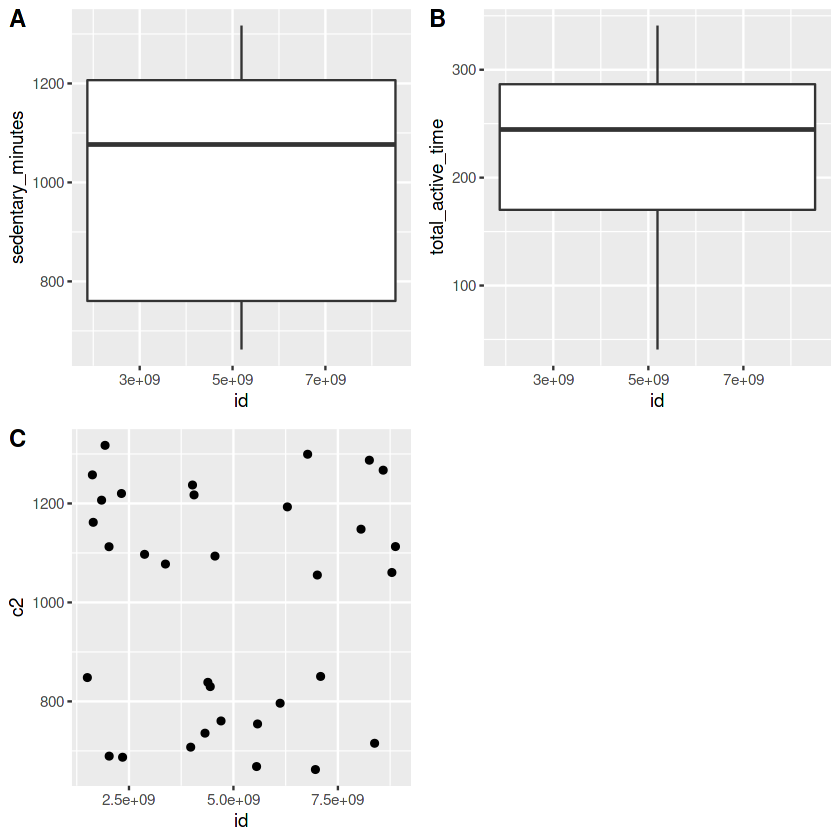

In [33]:
f1<-all_data %>% 
  mutate(total_active=very_active_minutes+fairly_active_minutes+lightly_active_minutes,sed_min=sedentary_minutes) %>%
  group_by(id) %>%
  summarise(total_active_time=mean(total_active),sedentary_minutes=mean(sed_min)) %>%
  ggplot() +
  geom_boxplot(aes(x=id,y=sedentary_minutes)) 

f2<-all_data %>% 
  mutate(total_active=very_active_minutes+fairly_active_minutes+lightly_active_minutes,sed_min=sedentary_minutes) %>%
  group_by(id) %>%
  summarise(total_active_time=mean(total_active),sedentary_minutes=mean(sed_min)) %>%
  ggplot() +
  geom_boxplot(aes(x=id,y=total_active_time)) 

f3<-all_data %>% 
  mutate(total_active=very_active_minutes+fairly_active_minutes+lightly_active_minutes,sed_min=sedentary_minutes) %>%
  group_by(id) %>%
  summarise(c1=mean(total_active),c2=mean(sed_min)) %>%
  ggplot(aes(x=id,y=c2)) +
  geom_point()

figure <- ggarrange(f1, f2, f3,
                    labels = c("A", "B", "C"),
                    ncol = 2, nrow = 2)
figure

Most of the participants spend their time sitting and working as we can see from the box plot, the average of sedentary minutes is around 1000. From the second point chart we can see most of the observations of sedentary minutes are falling over the average which means most of the time spent by paticipants is while sitting only. A day is 1440 minutes long out of which many participants spend 1000+ minutes as sedentary minutes which is about 70% of their day. The active time lies between 150 minutes and 300 minutes which is roughly about 17-18% of the day which further prooves that the average active minutes is way less than the average sedentary minutes for Particitpants.
> In order for Bellabeat to be profitable out of this customer lot they need to encourage participants to move by providing reminders using their app and their bands, wither hourly or custom duration reminders feature must be there embedded in the app.
Bellabeat while marketing their product should show this analysis as a part of its content to make participants aware about their behavior and in turn market their products as a solution to this problem.

Number of rows in Daily activity are  33 
Number of rows in Daily steps are  24 
Number of rows in Weight log are  8 


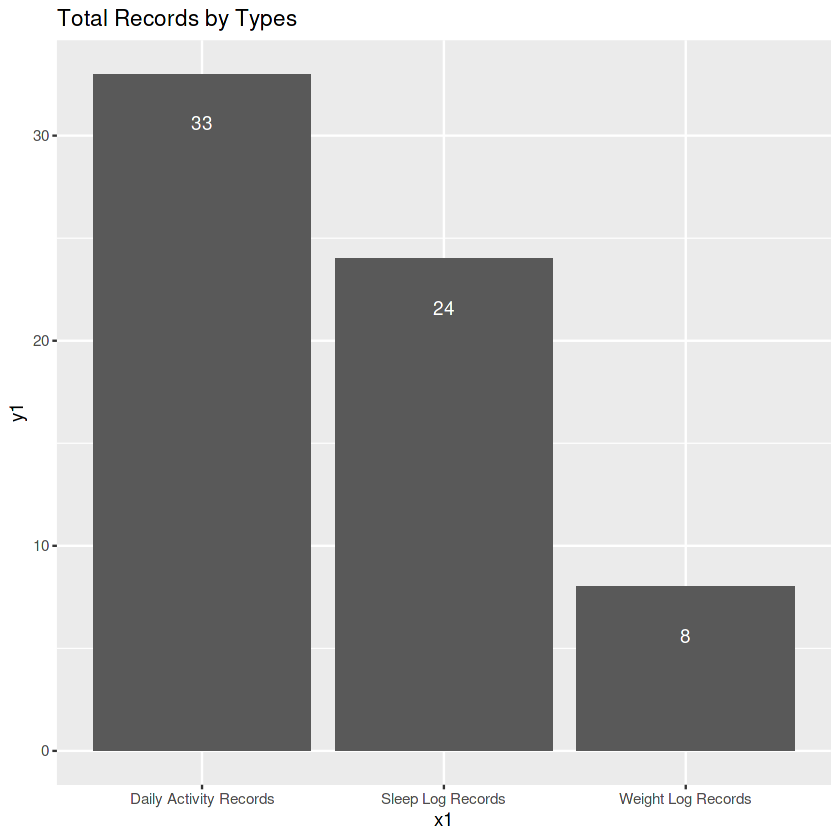

In [34]:
# To check the number of records in every set
cat("Number of rows in Daily activity are " , n_distinct(daily_act$id),"\n")
cat("Number of rows in Daily steps are " , n_distinct(sleep_log1$id),"\n")
cat("Number of rows in Weight log are " , n_distinct(weight_log1$id),"\n")

x1 <- c("Daily Activity Records","Sleep Log Records","Weight Log Records")
y1<- c(n_distinct(daily_act$id),n_distinct(sleep_log1$id),n_distinct(weight_log1$id))
df<-data.frame(x1,y1)
df %>%
  ggplot(aes(x=x1,y=y1)) +
  geom_col() +
  geom_text(aes(label=y1), vjust=4, color="white")+
  labs(title="Total Records by Types")

As we can see from the above graph almost all users have Daily activity record that the device helps in collecting but for sleep records and weight records there are missing entries, this will lead in spurious analysis and wrong results. 
> Bellabeat can overcome this limitation by providing easier recording and reminders of following activities integrated with their app and device to create a harmonious environment for the trackers to work. The experience should be seamless for users and it should not be a hassle for them as it can hinder the experience.

Lets see the correlation between Variables to see how certain variables are related to each other. Correlations will also tell us the behavior of users who use these smart bands and how their behavior has been effecting their lifestyle.

[1] 0.5915681

[1] 0.6449619

[1] 0.9304575

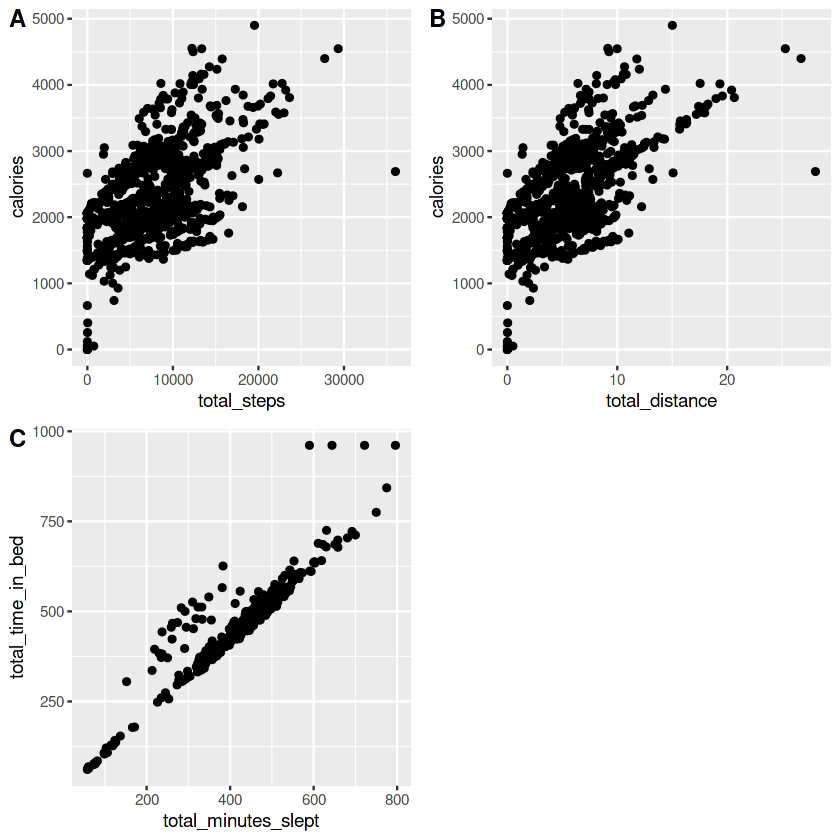

In [35]:
cor(daily_act$total_steps,daily_act$calories)
cor(daily_act$total_distance,daily_act$calories)
cor(sleep_log1$total_minutes_slept,sleep_log1$total_time_in_bed)

c1<-daily_act %>%
  ggplot(aes(x=total_steps,y=calories)) +
  geom_point() 
c2<-daily_act %>%
  ggplot(aes(x=total_distance,y=calories)) +
  geom_point()
c3<-sleep_log1 %>%
  ggplot(aes(x=total_minutes_slept,y=total_time_in_bed)) +
  geom_point()
ggarrange(c1, c2, c3 , labels = c("A", "B", "C"),ncol = 2, nrow = 2)
#grid.arrange(c1,c2,c3)

Correlation shows the degree to which 2 variables move in relation to each other. 
The above values show the correlation between variables. 
We can deduce that - 
1. The correlation between Total steps and calories burnt is positive, that means the more the total steps the more the calories burnt.
2. The correlation between Total distance and calories burnt is also positive, that means the more the participants walked in terms of distance the more calories they burnt.
3. Total minutes slept and total time in bed show a high positive correlation indicating the fact that the more time participants spent on bed the more minutes they slept.
> From the above correlation charts we find that participants who walked more had more steps which resulted in more calories burnt, in order for Bellabeat to compete with its competitors and win market share their main focus should be on steps tracking and activity tracking. Their padometer should be accurate in order to record the exact steps and calories burnt and Trackers should be smart enough to provide with smart notification in order to encourage users to walk more and remind them to burn calories.

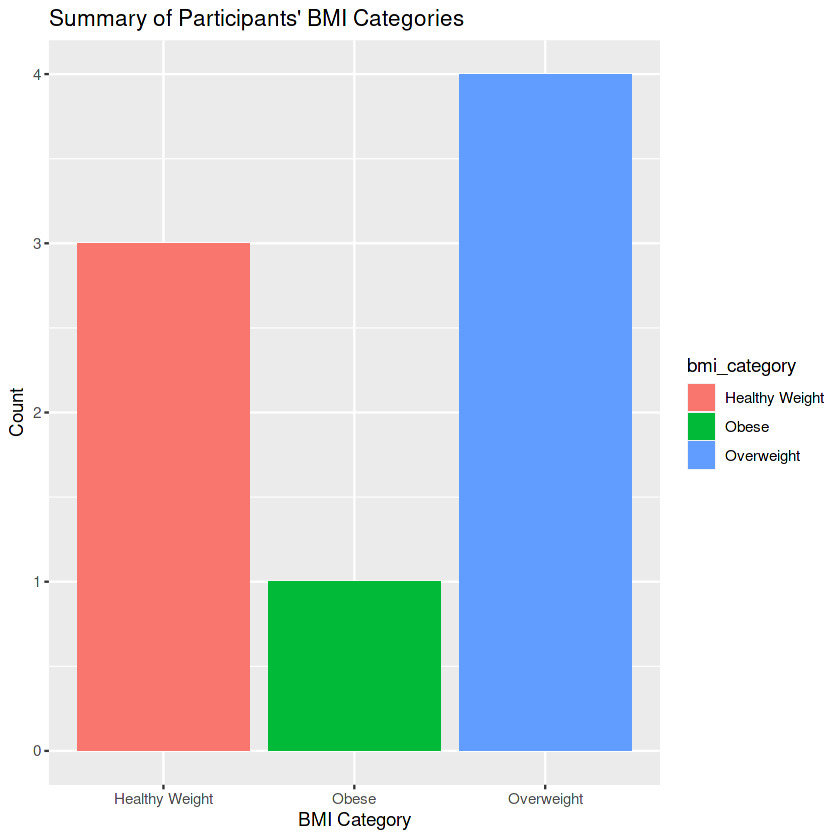

In [36]:
weight_log1 %>%
  group_by(id,bmi_category) %>%
  summarise(count=n(), .groups = 'drop') %>%
  ggplot(aes(x=bmi_category,fill = bmi_category))+
  geom_bar() +
  labs(title = "Summary of Participants' BMI Categories",x = "BMI Category",y = "Count")

Following observations have been noted down from participants BMI -
1. There are many missing values, only 8 people have measured their weight other people do not measure their weight on a regular basis.
2. More than 50% of those who recorded their weight are obese and overweight, with a BMI of 25 - 29.9.
3. Participants are not ready to share their wieght data with Fitbit either because of difficulty in entering data or because of forgetful natuer of the activity. Bellabeat app should have a system in which it is easier than Fitbit app to record weight of the users and it should remind users to log in their weight in order to successfully track accurate results.
> Bellabeat Trackers should be integrated with their smart app in such a way that they provide suitable recomendations based on the weight, activity level and goals of an individual, Bellabeat membership should include packages which have respective exercises to recomend to individuals according to the profile of the user. All this should be synced with the ap and tracker on a regular basis as to provide a seamless experience through which users can see all the health related issues.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



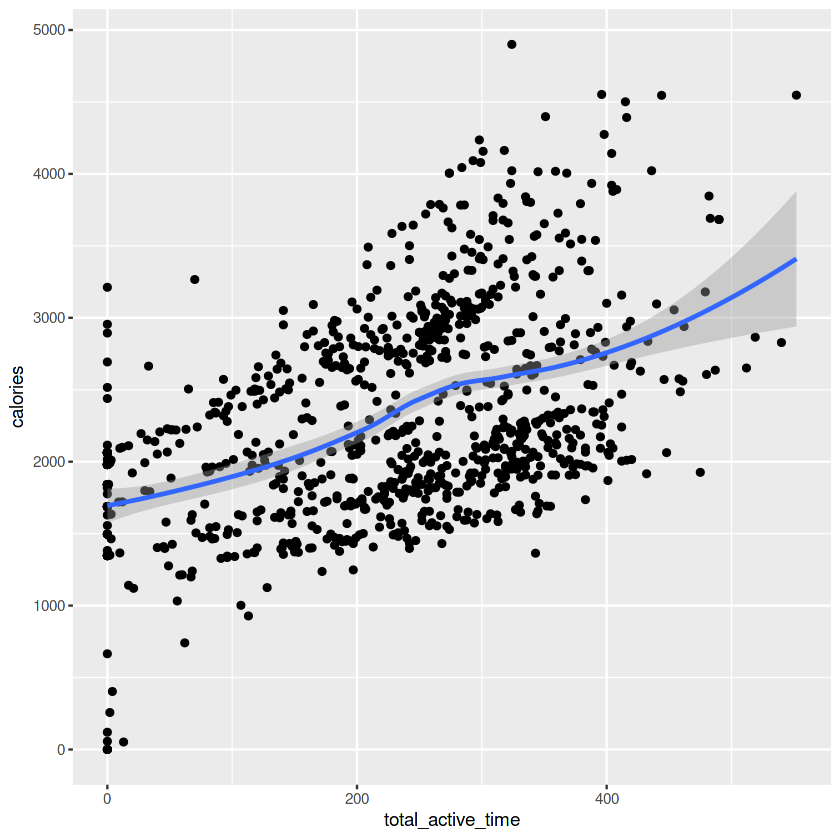

In [37]:
all_data %>%
  mutate(total_active_time=very_active_minutes+fairly_active_minutes+lightly_active_minutes) %>%
  ggplot(aes(x=total_active_time,y=calories)) +
  geom_point() + 
 geom_smooth()

**Positive relationship between daily activity and calories burned.**

The plot chart shows the correlation between total active minutes and calories burned, it is positive. This means the more the participants were active the more calories they spent.
> A positive relationship between daily activity and calories burnt indicate that activity should be high to burn high calories. The tracker and app should be closely integrated to provide with smart notifications to the user so that the user is always encouraged to move and increase activity. In order for the user to keep on improving their activity status there should also be a reward system in place where the user get rewarded when they achieve their goals which will encourage them to do more.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



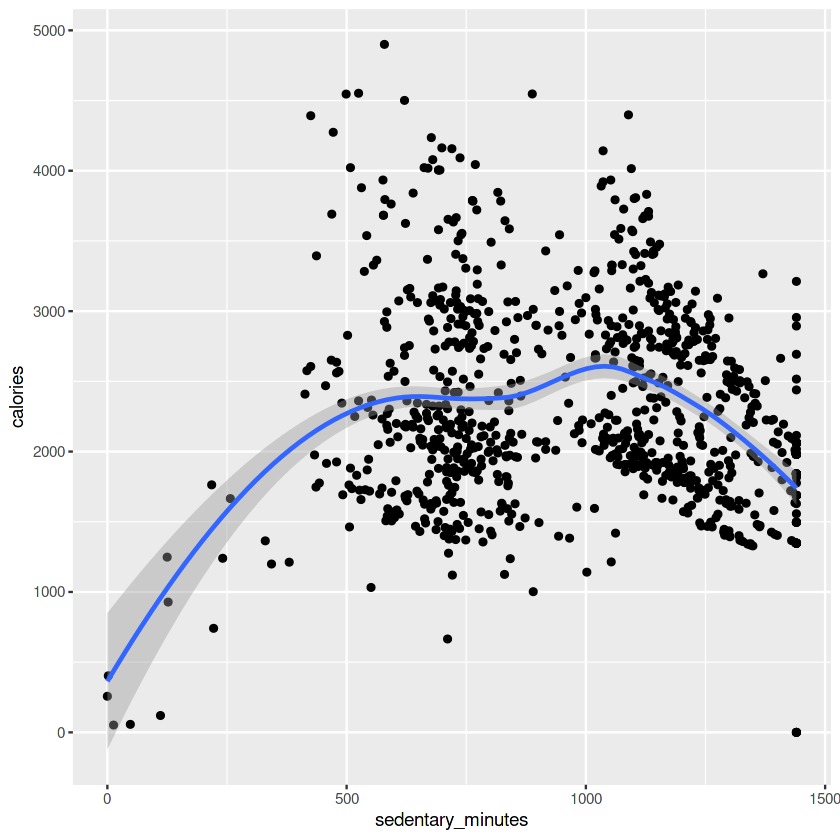

In [38]:
all_data %>%
  ggplot(aes(x=sedentary_minutes,y=calories)) +
  geom_point() + 
 geom_smooth()

**Negative relationship between sedentary minutes spent and calories burned.**

The plot chart shows the correlation between sedentary minutes spent and calories burned, it is negative. This means the more the participants were sitting at place the less calories they spent. So in order to spend/ burn calories participants need to move and increase their active time.
> Bellabeat should encourage users to move more in order to burn more calories, the bands should be intelligent to notice long sedentary minutes in order to make users aware of the problem. 

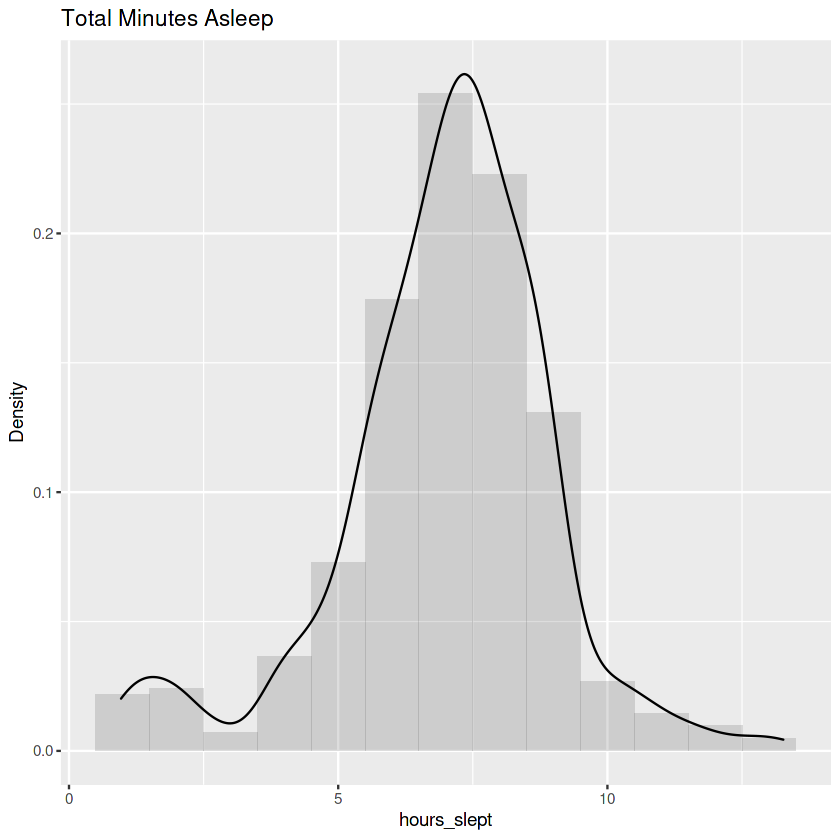

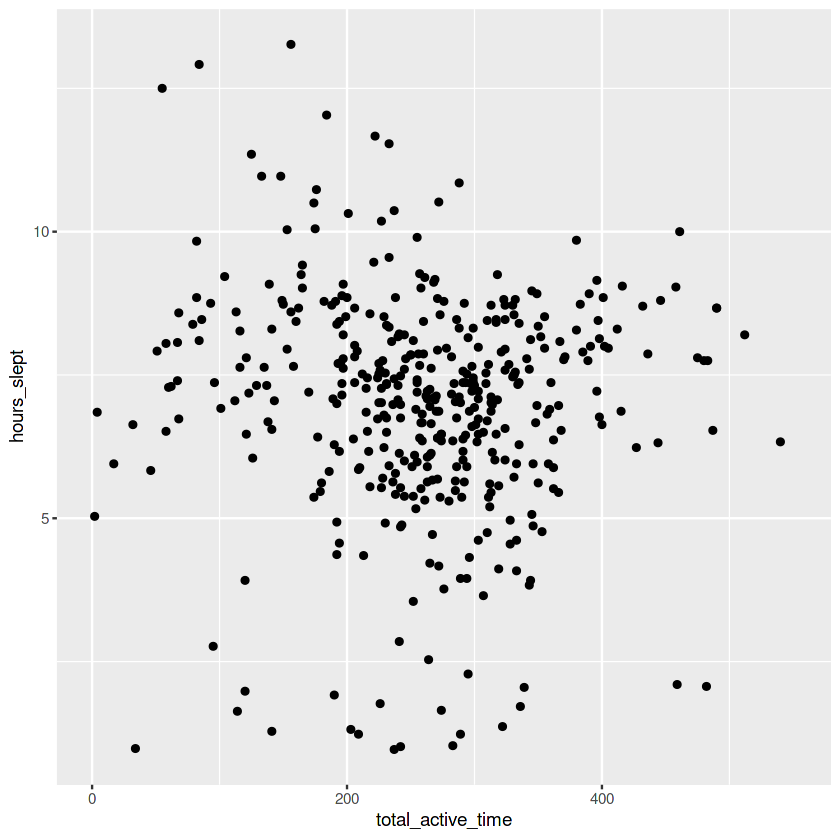

In [39]:
sleep_log1 %>%
ggplot(aes(x=hours_slept)) + 
  geom_histogram(aes(y=..density..), binwidth=1,alpha=0.2)+
  geom_density(alpha=0.2) +
  labs(title="Total Minutes Asleep", x= "hours_slept", y="Density")

all_data %>%
  filter(hours_slept>=5 && hours_slept<=10) %>%
  mutate(total_active_time=very_active_minutes+fairly_active_minutes+lightly_active_minutes) %>%
  ggplot(aes(x=total_active_time,y=hours_slept)) +
  geom_point()

Following observation were noted down from the sleep data - 
1. Most of the participants sleep between 5 and 10 hours.
2. However there are participants who sleep for less than 5 hours also and some who sleep more than 10 hours.
3. From the correlation plot between total active minutes and hours slept we can see there is no correlation between the two variables, which means it is not neccessary that participants who slept more are more active.

Following observation were noted down from the above data - 
* As we can see from the above chart that participants are most active tuesday and wednesday, least active on Sunday because it is a holiday.
* From the chart we can also see that total active time increases from sunday onwards till tuesday where it peaks and then reduces as we on towards Sunday.

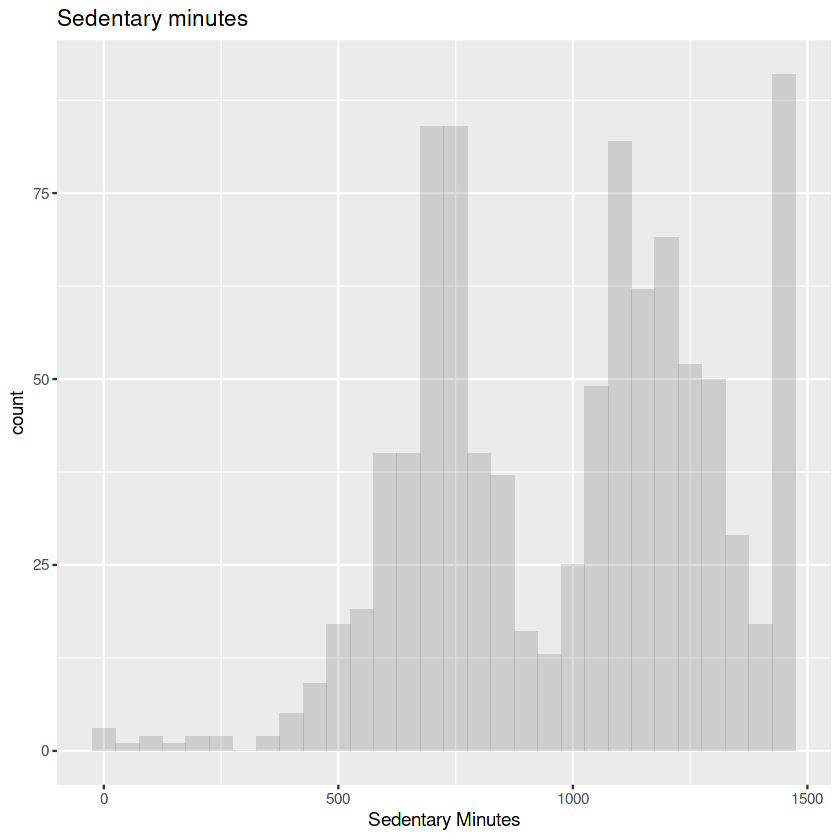

In [40]:
all_data %>%
ggplot(aes(x=sedentary_minutes)) + 
  geom_histogram(binwidth=50,alpha=0.2)+
  labs(title="Sedentary minutes", x= "Sedentary Minutes")

The above graph shows that the sedentary minutes are high in many participants and only very few participants have an active always on the move lifestyle.
As we can see from above graph most of the participants have sedentary minutes between 500 and 1500 which is where most of the data is concentrated.

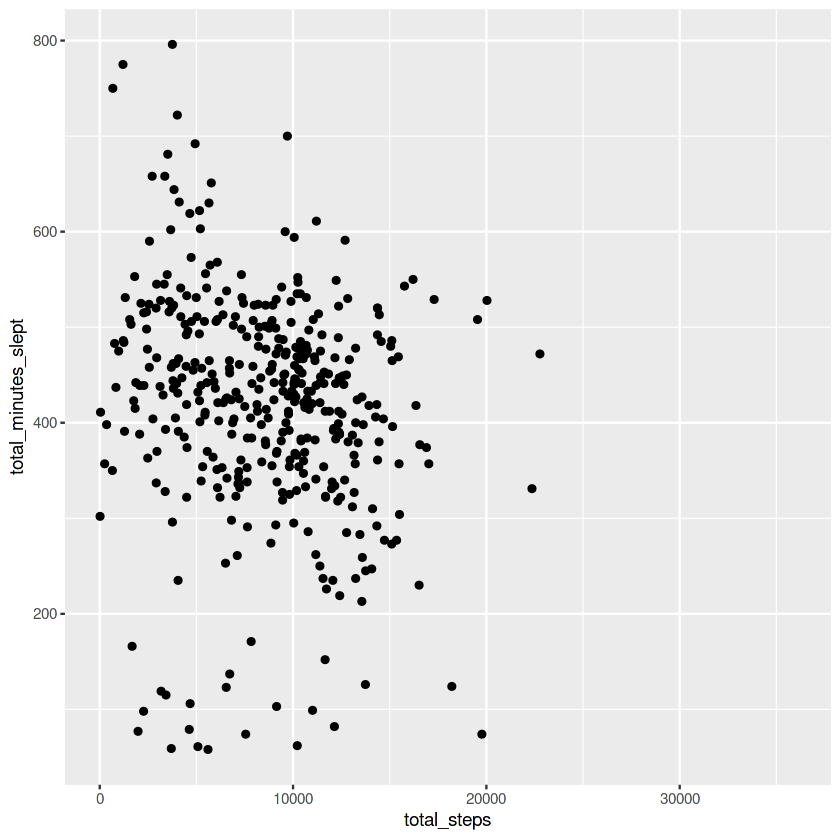

In [41]:
all_data %>% 
  ggplot(aes(y=total_minutes_slept,x=total_steps)) +
  geom_point()

The above chart shows the relation between total minutes slept and total steps, the more the participants slept the more active they felt and the more steps they took which in turn burned more calories, so it is a win win for both users and participants.
> Bellabeat should also have exercises that help users in sleeping, apps can have relaxing exercises and sleep tracking functionality using the tracker in order to keep a track of quality sleep and making users sleep through different breathing, relaxing techniques.

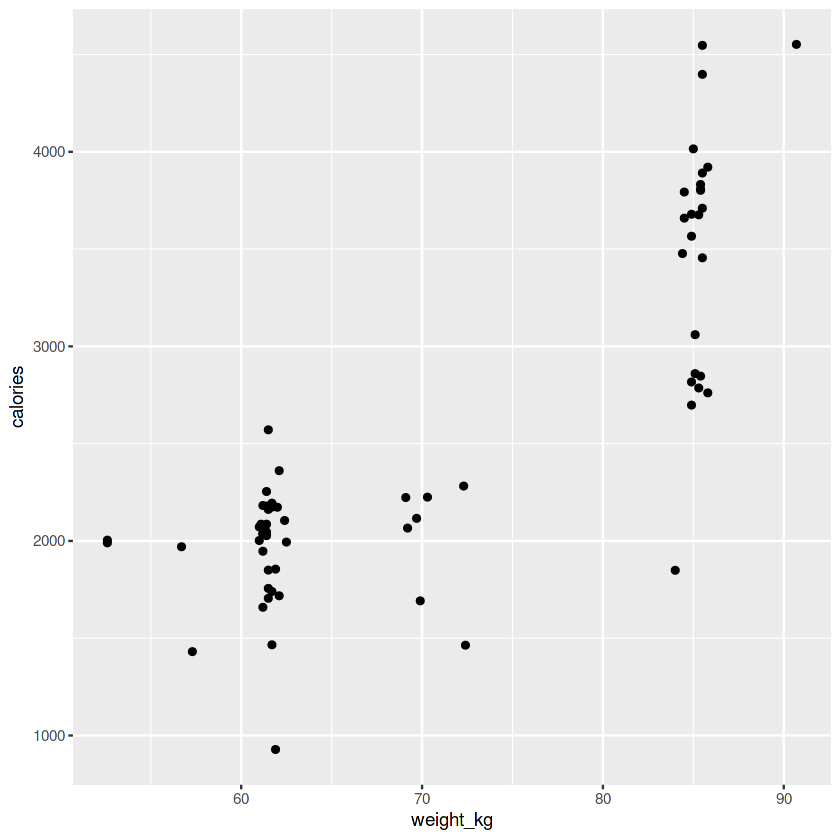

In [42]:
all_data %>% 
 filter(weight_kg<120) %>%
  ggplot(aes(y=calories,x=weight_kg)) +
  geom_point()

From the above chart we can see there is no correlation between calories burnt and weight in kg, but what we see is a very intersting behavior that participants who tend be overweight tend to loose more calories when compared to people with less weight.
> The following observation makes it clear for BellaBeat to focus more of its attention towards people with more weight because poeple with more weight have a high scope for more calories burnt, so the marketing team at Bellabeat can focus on improving service and introducing more customized packages for people who are overweight.

# **5. SHARE PHASE**

Questions to be answered - 

1. What is the behavior of users with respect to Fitbit.
2. Can this behavioral pattern be applied to Bellabeat products in order to improve the customer experience and gain market share?
3. What story does the data tell?
4. Data should be visualised in order to get patterns from the data and understand it better to provide better recomendations.

The analysis is shared as a presentation to all stakeholders in Bellabeat. The insights gathered from the analysis are mention in the next section to provide Bellabeat with recomendations to improve their services and experience which in turn will help them gain respectable market share and become a preferred brand for health and lifestyle.

# **6. ACT PHASE**

**Insights from the analysis**

The above analysis of Fitbit users has provided us with various insights related to user behavior and tracking style that fitbit follows. Based on the analysis above below are the recomendations for Bellabeat in order to win market share and provide a unique experience to its users.
1. The ecosystem in which Bellabeat fitness trackers and app should work must be properly bound together so there is a seamless communication between all the entities in the ecosystem which in turn will provide users with a unique experience.
2. Users should get regular notifications when sedentary hours are more than active hours accordingly the tracker should encourage them to move and increase active hours.
3. The tracker should be able to sync all data with the app without any human intervention and should keep all data in order for the user to view activity data at one place without interruptions.
4. From the Fitbit data we saw many users were not recording their weight and sleep, because of maybe the cumbersome process to record it. Bellabeat can overcome this by providing a seamless experience to enter this data thorugh reminders to enter this data in the app. Sleep tracking should be automatic when the users go to sleep and should sync this data with the app everyday at a specific time so that there is no miss in sleep tracking for any user.
5. The data showed most very active minutes were logged on Monday and Tuesday. Keeping Bellabeat's users motivated to work out for the remainder of the week could increase these numbers.
6. There can be a reward system in Bellabeat app which rewards the users who break theri own PR in activity time or for those who improve their activity state everyday, a reward system where users get rewarded points and in turn can use these points on the app to buy products for which Bellabeat should partner with different companies to sell products in place of Bellabeat points. This will not only act as a marketing opportunity for Bellabeat but other partners asw ell and will encourage users to increase active participation in the process of tracking and in turn building a healthy lifestyle for themselves.

**Further Recomendations**

1. The above data does not provide any insight on menstruation cycles and other details regarding reproductive health because that data can provide very powerful insights on women which can in turn help Bellabeat in providing more cutomized service for the users. Data gathered wasnt enough to provide any solid context on the above mentioned point.
2. The need to obtain current data, to better reflect current consumer behaviours.
3. A larger sample size, to improve statistical significance
4. Collect a longer period of tracking data, ideally for 6months to a year, to account for consumer behaviour changes due to seasons.